In [1]:
#Import everything#
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
#Bring in the Datasets #
genuine_tweets = pd.read_csv("C:/Twitter/genuine_accounts/tweets.csv")
genuine_users = pd.read_csv("C:/Twitter/genuine_accounts/users.csv")

C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sbot_tweets_1 = pd.read_csv("C:/Twitter/social_spambots_1/tweets.csv")
sbot_users_1 = pd.read_csv("C:/Twitter/social_spambots_1/users.csv")
sbot_tweets_2 = pd.read_csv("C:/Twitter/social_spambots_2/tweets.csv")
sbot_users_2 = pd.read_csv("C:/Twitter/social_spambots_2/users.csv")
sbot_tweets_3 = pd.read_csv("C:/Twitter/social_spambots_3/tweets.csv")
sbot_users_3 = pd.read_csv("C:/Twitter/social_spambots_3/users.csv")
ffollow_users = pd.read_csv("C:/Twitter/fake_followers/users.csv")
ffollow_tweets = pd.read_csv("C:/Twitter/fake_followers/tweets.csv")

C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tbot_tweets = pd.read_csv("C:/Twitter/traditional_spambots_1/tweets.csv")
tbot_users_1 = pd.read_csv("C:/Twitter/traditional_spambots_1/users.csv")
tbot_users_2 = pd.read_csv("C:/Twitter/traditional_spambots_2/users.csv")
tbot_users_3 = pd.read_csv("C:/Twitter/traditional_spambots_3/users.csv")
tbot_users_4 = pd.read_csv("C:/Twitter/traditional_spambots_4/users.csv")

In [5]:
#Re-attach the separated dataframes

sbot_tweets = pd.concat([sbot_tweets_1, sbot_tweets_2, sbot_tweets_3])
sbot_users = pd.concat([sbot_users_1, sbot_users_2, sbot_users_3])
tbot_users = pd.concat([tbot_users_1, tbot_users_2, tbot_users_3, tbot_users_4])

C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [6]:
#Now create a label for where tweets and users came from and attach all datasets together 

sbot_tweets['origin'] = 'socialbot'
genuine_tweets['origin'] = 'real'
ffollow_tweets['origin'] = 'followbot'


sbot_users['origin'] = 'socialbot'
genuine_users['origin'] = 'real'
ffollow_users['origin'] = 'followbot'


In [7]:
##in order to run well on the laptop, time to trim down the dataset into purely english users. 

ffollow_users_eng = ffollow_users[ffollow_users['lang'] == 'en']
genuine_users_eng = genuine_users[genuine_users['lang'] == 'en']
sbot_users_eng = sbot_users[sbot_users['lang'] == 'en']



In [157]:
#Sorting in order to check user_id values
genuine_tweets.sort_values(by=['user_id']).head()






,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,origin
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.000000e+00,0.0,NaN,5.939322e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19,real
2125,547384258701312001,RT @chrisgeidner: Thirty-Five Injured In Attac...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.000000e+00,0.0,NaN,5.471446e+17,NaN,...,NaN,NaN,0.0,1.0,2.0,Tue Dec 23 13:32:31 +0000 2014,2014-12-23 14:32:31,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2126,547382436011995136,RT @tanehisicoates: This @HeerJeet ethering is...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.000000e+00,0.0,NaN,5.472183e+17,NaN,...,NaN,NaN,0.0,1.0,2.0,Tue Dec 23 13:25:17 +0000 2014,2014-12-23 14:25:17,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2127,547379659630190593,RT @tanehisicoates: People arguing we should c...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.000000e+00,0.0,NaN,5.471561e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Tue Dec 23 13:14:15 +0000 2014,2014-12-23 14:14:15,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2128,547377097954832384,@jelani9 Oy. I can't believe you had to spell ...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,5.471531e+17,14155907.0,jelani9,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,3.0,Tue Dec 23 13:04:04 +0000 2014,2014-12-23 14:04:04,2015-05-01 12:57:22,2015-05-01 12:57:22,real


In [9]:
#Abbreviate columns to just relevant ones 
sbot_abbr = sbot_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
genuine_abbr = genuine_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
ffollow_abbr = ffollow_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]


In [10]:
#Eliminate any rows with empty values 
sbot_abbr_clean = sbot_abbr.dropna()
genuine_abbr_clean = genuine_abbr.dropna()
ffollow_abbr_clean = ffollow_abbr.dropna()


In [11]:
#Turn all id's into integers.
genuine_abbr_clean['user_id'] = genuine_abbr_clean['user_id'].astype('int64')
sbot_abbr_clean['user_id'] = sbot_abbr_clean['user_id'].astype('int64')
ffollow_abbr_clean['user_id'] = ffollow_abbr_clean['user_id'].astype('int64')


C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [12]:
genuine_id_list = list(genuine_users_eng['id'][:500])
sbot_id_list = list(sbot_users_eng['id'][:500])

In [13]:
idx = 0 

genuine_tweets_set = []

while idx < 280000:
    if genuine_abbr_clean.iloc[idx, 1] in genuine_id_list :
        genuine_tweets_set.append(genuine_tweets.iloc[idx, :])
    idx += 1 
    
genuine_tweets_df = pd.DataFrame(genuine_tweets_set)

In [37]:
#Length of 46,191 sbot tweets

idx = 0 

sbot_tweets_set = []

while idx < 280000:
    if sbot_abbr_clean.iloc[idx, 1] in sbot_id_list :
        sbot_tweets_set.append(sbot_tweets.iloc[idx, :])
    idx += 1 
    
sbot_tweets_df = pd.DataFrame(sbot_tweets_set)

In [39]:
# Merge, then trim down the datasets here
genuine_combined_eng = pd.merge(genuine_users_eng, genuine_tweets_df, how='inner', left_on = 'id', right_on = 'user_id')
sbot_combined_eng = pd.merge(sbot_users_eng, sbot_tweets_df, how='inner', left_on = 'id', right_on = 'user_id')

In [41]:
#Complete prepping the rest of the data

genuine_combined_eng = genuine_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]
genuine_combined = genuine_combined_eng.dropna()
sbot_combined_eng = sbot_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]
sbot_combined = sbot_combined_eng.dropna()

ffollow_combined_eng = pd.merge(ffollow_users_eng, ffollow_tweets, how='inner', left_on = 'id', right_on='user_id')
ffollow_combined= ffollow_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]


In [43]:
#Shuffle the dataframe before slicing
ffollow_combined = ffollow_combined.sample(frac=1)
genuine_combined = genuine_combined.sample(frac=1)
sbot_combined = sbot_combined.sample(frac=1)


#dataframe.sample frac = 1 (find a better way to shuffle the dataframe -> Returns a shuffled frame) 

In [45]:
#Trim the size of these dang datatsets 
#Also assemble our test, validation, and test sets
ffollow_combined_eng_cut = ffollow_combined[:24000]
validation_cut_1 = ffollow_combined[24000:32000]
test_cut_1 = ffollow_combined[32000:40000]
genuine_combined_eng_cut = genuine_combined[:24000]
validation_cut_2 = genuine_combined[24000:32000]
test_cut_2 = genuine_combined[32000:40000]
sbot_combined_eng_cut = sbot_combined[:24000]
validation_cut_3 = sbot_combined[24000:32000]
test_cut_3 = sbot_combined[32000:40000]



In [47]:
#Combine the datasets together 
all_tweets = pd.concat([sbot_combined_eng_cut, ffollow_combined_eng_cut, genuine_combined_eng_cut])
validation_cut = pd.concat([validation_cut_1, validation_cut_2, validation_cut_3])
test_cut = pd.concat([test_cut_1, test_cut_2, test_cut_3])

In [ ]:
train = all_tweets['friends_count']
test = test_cut['friends_count']
bins = np.linspace(0, 5000, 100)

plt.hist(train, bins, alpha=0.5, label='Training text', color='red')
plt.hist(test, bins, alpha=0.5, label='Test text', color='black')
plt.xlabel('')
plt.legend(loc='upper right')
plt.title('Friends count distribution in training and test data', fontsize=14)
plt.show()

"""
The feature distribution of the training sample and the test sample, at least in terms of friends, seems similar enough between the
two conditions. This suggests a good level of external validity in test results. 
"""

In [49]:
#Bring in Natural Language Processing Tools
import nltk 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0)
#Look at nltk resources then begin! 

In [50]:
#Define make_xy generic function


def make_xy(tweets, vectorizer=None):
        
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(tweets.text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (tweets['origin_x'] == 'real').values.astype(np.int)
    return X, y

#X, y = make_xy(all_tweets)


In [51]:
all_tweets = all_tweets.dropna()

In [52]:
vectorizer.fit(all_tweets['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [53]:
x = vectorizer.transform(all_tweets['text'])

In [54]:

def top_tfidf_featstop_tfid (row, features, top_n=10):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=10):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=10):
    dfs = []
    #labels = np.unique(y)
    labels = [2,7]
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(8, 30), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        #z = int(str(int(i/3)+1) + str((i%3)+1))
        ax = fig.add_subplot(9, 1, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=16)
        ax.set_ylabel("Word", labelpad=16, fontsize=16)
        ax.set_title("Class = " + str(df.label), fontsize=18)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [55]:
#Need tfidf transform first
from sklearn.feature_extraction.text import TfidfVectorizer
def top_tfidf_feats(row, features, top_n=10):
    topn_ids = np.argsort(row)[::-1][:top_n] #<--- argsort? 
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf'] #<--- Makes dataframe of top 10 most common features 
    return df

tfidf = TfidfVectorizer(min_df=6, max_df=0.75).fit(all_tweets["text"])

In [56]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

Exploratory Data Analysis

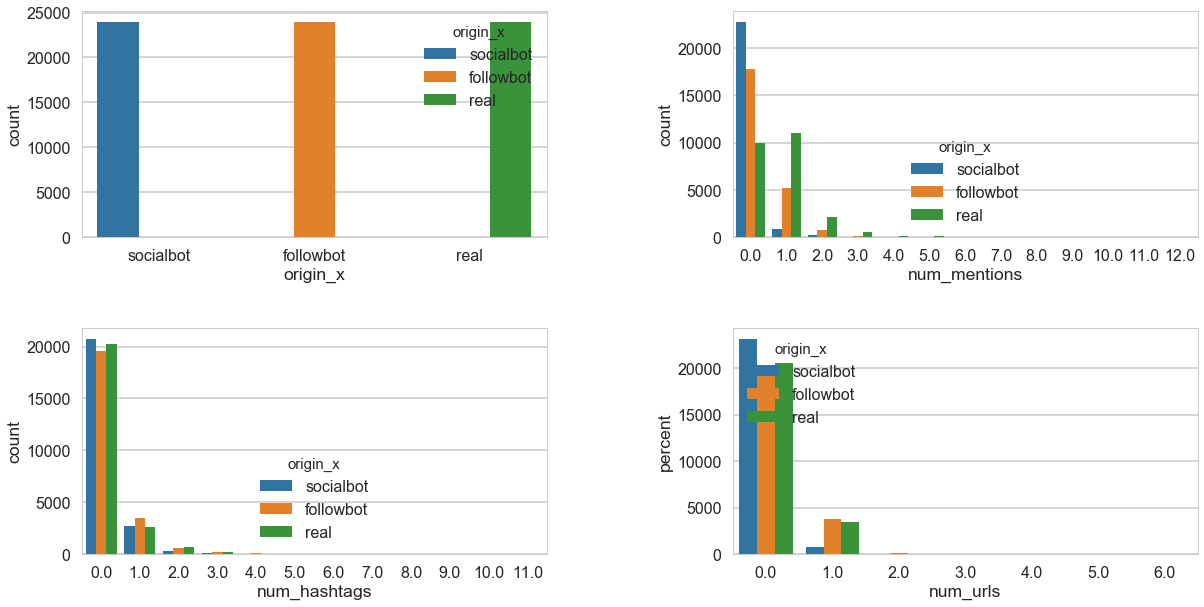

In [61]:
from itertools import chain

categ_vars = ['origin_x', 'num_mentions', 'num_hashtags', 'num_urls']
fig, ax = plt.subplots(nrows = 2, ncols = 2 ,figsize=(20,10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
ax = list(chain.from_iterable(ax)) #Change ax from matrix to a list for iteration 
for i in range(len(categ_vars)):
    sns.countplot(all_tweets[categ_vars[i]], hue=all_tweets['origin_x'], ax=ax[i])
    plt.ylabel("percent")
    plt.plot()
    
    
#ax = sns.barplot(x="x", y="x", data=df, estimator=lambda x: len(x) / len(df) * 100)
#ax.set(ylabel="Percent")

(-0.5, 5)

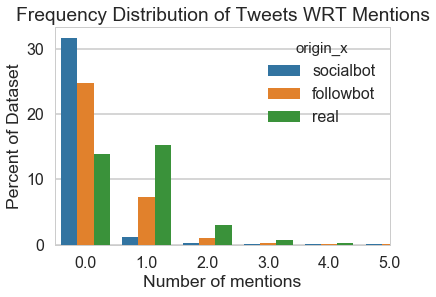

In [58]:
sns.barplot(x='num_mentions', y='num_mentions', data=all_tweets, estimator=lambda x: len(x)/len(all_tweets) * 100,hue=all_tweets['origin_x'])
plt.ylabel("Percent of Dataset")
plt.xlabel("Number of mentions")
plt.title("Frequency Distribution of Tweets WRT Mentions")
plt.xlim(xmax=5)

#It appears that the more mentions that are included in a tweet, the more likely it is to be real. 
#Also of note is that follow bots tend to use the "mention" feature more than typical social bots. 

(-0.5, 3)

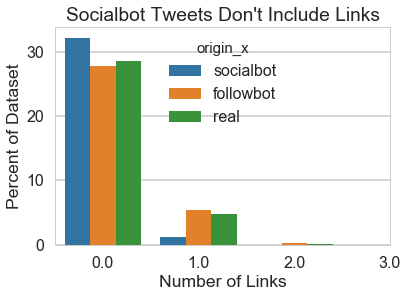

In [59]:
sns.barplot(x='num_urls', y='num_urls', data=all_tweets, estimator=lambda x: len(x)/len(all_tweets) * 100,hue=all_tweets['origin_x'])
plt.ylabel("Percent of Dataset")
plt.xlabel("Number of Links")
plt.title("Socialbot Tweets Don't Include Links")
plt.xlim(xmax=3)

(-0.5, 4)

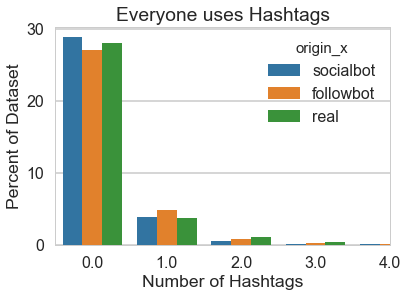

In [60]:
sns.barplot(x='num_hashtags', y='num_hashtags', data=all_tweets, estimator=lambda x: len(x)/len(all_tweets) * 100,hue=all_tweets['origin_x'])
plt.ylabel("Percent of Dataset")
plt.xlabel("Number of Hashtags")
plt.title("Everyone uses Hashtags")
plt.xlim(xmax=4)

In [62]:
#Make categories out of followers

idx = 0 
all_tweets['followers_bucket'] = 0

while idx < len(all_tweets) :

    if all_tweets.iloc[idx, 4] == 0 :
        all_tweets.iloc[idx, 14] = "0 followers"
    elif all_tweets.iloc[idx, 4] <= 5: 
        all_tweets.iloc[idx, 14] = "0-5 followers"
    elif all_tweets.iloc[idx, 4] <= 25:
        all_tweets.iloc[idx, 14] = "6-25 followers"
    elif all_tweets.iloc[idx, 4] <= 100:
        all_tweets.iloc[idx, 14] = "26-100 followers"
    elif all_tweets.iloc[idx, 4] <= 500: 
        all_tweets.iloc[idx, 14] = "101-500 followers"
    else :
        all_tweets.iloc[idx, 14] = "500+ followers"
    idx += 1

all_tweets.head()

,id_x,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at_y,text,num_hashtags,num_urls,num_mentions,origin_x,followers_bucket
32622,434729769,Isacco Tombolini,IsaccoTombo,458,4447,4807,0,1,Wed Jul 16 05:09:41 +0000 2014,"Era bello far l'amore in silenzio, nei portoni...",0.0,0.0,0.0,socialbot,500+ followers
7978,237192993,Monica Carta,Moniqueeo84,513,5772,6022,0,7,Thu Apr 24 07:28:57 +0000 2014,-Tutti noi abbiamo bisogno di credere in qualc...,0.0,0.0,0.0,socialbot,500+ followers
24736,237375183,Lydia Wallace,Lydiali76,497,4420,4731,0,5,Sun Apr 20 18:09:42 +0000 2014,"il Web compie 25 anni, festeggierà spegnendo d...",0.0,0.0,0.0,socialbot,500+ followers
44798,465401166,Volk Silvers,ViolaTorino,275,3831,4216,0,1,Thu Oct 30 23:07:51 +0000 2014,Mai disperarsi per chi va via dalla tua vita.....,0.0,0.0,0.0,socialbot,500+ followers
39933,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sat Feb 15 06:49:39 +0000 2014,"I ragazzini di oggi, senza ginocchia sbucciate...",0.0,0.0,0.0,socialbot,500+ followers


In [63]:

followers_order = ["0 followers", "0-5 followers", "6-25 followers", "26-100 followers", "101-500 followers", "500+ followers"]
sorted_tweets = all_tweets.set_index("followers_bucket").loc[followers_order]

Text(0.5,1,'Real Accounts (Almost) Never Have Fewer than 100 followers')

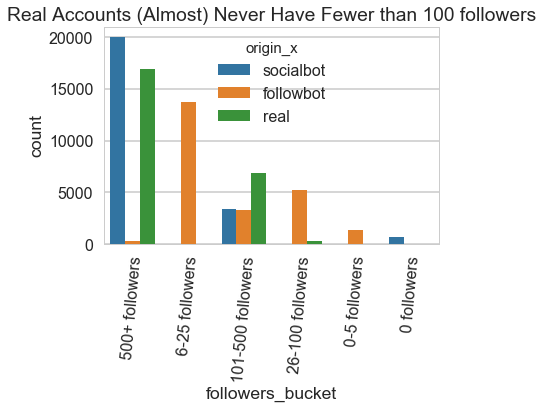

In [64]:
graph = sns.countplot(x=sorted_tweets.index, data=sorted_tweets, hue=sorted_tweets['origin_x'], order=sorted_tweets.index.value_counts().index)
plt.xticks(rotation=85)
plt.title('Real Accounts (Almost) Never Have Fewer than 100 followers')

#By sorting in descending count order, it becomes apparent that (1) bots built to follow have very few followers themselves,
#(2) social bots tend to compensate with an extremely large number of followers, and (3) real accounts nearly always have alt least over 100 followers

In [112]:
followers_order = ["0 followers", "0-5 followers", "6-25 followers", "26-100 followers", "101-500 followers", "500+ followers"]

In [126]:
sbot_counts_order = [900, 0, 0, 0, 3004, 20000]
fbot_counts_order = [0, 1100, 14200, 5290, 2900, 200]
real_counts_order = [0, 0, 0, 180, 6700, 17000]


Text(0.5,1,'Real Accounts (Almost) Always Have Followers - and Often Many')

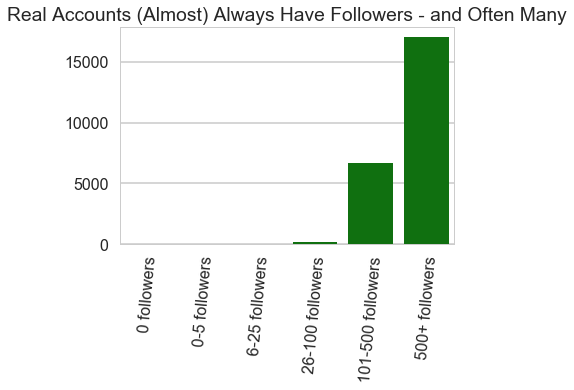

In [129]:
sns.barplot(x=followers_order, y=real_counts_order, color='green')
plt.xticks(rotation=85)
plt.title('Real Accounts (Almost) Always Have Followers - and Often Many')

Text(0.5,1,'Follow Bots (Almost) Never Have Over 500 followers')

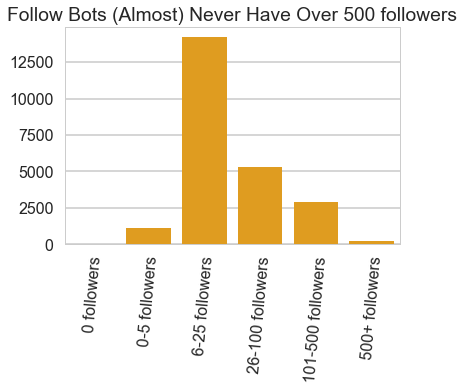

In [128]:
sns.barplot(x=followers_order, y=fbot_counts_order, color='orange')
plt.xticks(rotation=85)
plt.title('Follow Bots (Almost) Never Have Over 500 followers')

Text(0.5,1,'Real Accounts (Almost) Never Have Fewer than 100 followers')

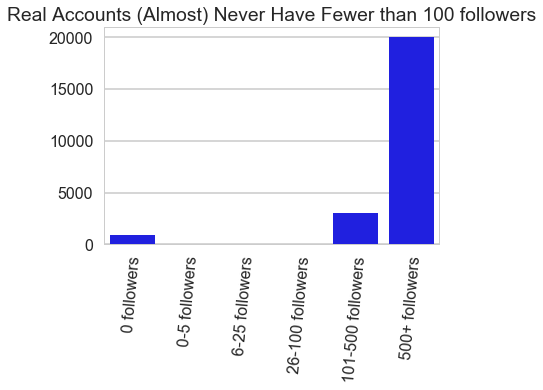

In [125]:
sns.barplot(x=followers_order, y=sbot_counts_order, color='b')
plt.xticks(rotation=85)
plt.title('Social Bots (Almost) Never Have Fewer than 100 followers')

-----------------------------Word and model processing----------------------------------------

Text(0,0.5,'Percent of df')

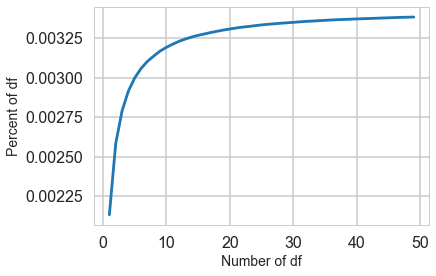

In [65]:
#In order to tune hyperparameters of our count vectorizer, let's look
#for an elbow value that captures a sizeable portion of our dataframe
#without overfitting.

#set up grid
sns.set_style("whitegrid")
sns.set_context("poster")

# plot to find minimum df
vectorizer = CountVectorizer(min_df=1)
X,y = make_xy(all_tweets,vectorizer=vectorizer)
dfs = []
for i in range(1,50):
    vectorizer = CountVectorizer(max_df=i)
    X,y = make_xy(all_tweets,vectorizer=vectorizer)
    dfs.append(X.shape[1])
dfs_percent = [df/31690362 for df in dfs]
plt.plot(range(1,50),dfs_percent)
plt.xlabel('Number of df', fontsize=14)
plt.ylabel('Percent of df', fontsize=14)

#The graph shows an elbow in the graph around a min_df of about
#6 or 7. This will define the CountVectorizer as we move forward


In [66]:
#Simplifying columns, reducing origin to a single word.
all_tweets2 = all_tweets.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})
validation_cut2 = validation_cut.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})
test_cut2 = test_cut.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})

In [67]:
from sklearn.model_selection import train_test_split

y = all_tweets2['origin']
X_train, X_test, y_train, y_test = train_test_split(all_tweets2['text'], y, test_size=0.33, random_state=53)

In [68]:
def word_vect(vectorizer):
    train = vectorizer.fit_transform(X_train.values)
    test = vectorizer.transform(X_test.values)
    return vectorizer,train,test

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer,count_train,count_test = word_vect(vectorizer = CountVectorizer(min_df=6, stop_words='english'))
print('features length of counter vectorizer: ', len(count_vectorizer.get_feature_names()))

features length of counter vectorizer:  9716


Machine Learning Model Section

In [69]:
# Model #1: Unmodified model 

from sklearn.model_selection import train_test_split
import sklearn.naive_bayes

#1. Initialize a vectorizer with min_df of 0
vectorizer = CountVectorizer(min_df=7)

#2. Create a new Multinomial classifier model with trial alpha
model = sklearn.naive_bayes.MultinomialNB(alpha=1)

#3. Fit the vectorizer to get all of the quotes into the appropriate format
vectorizer.fit_transform(all_tweets.text)

#4. Make X, y for training sets 
X, y = make_xy(all_tweets, vectorizer)





In [70]:
#5. Fit the model to the transformed quotes
model.fit(X, y)

test_cut = test_cut.dropna()
testX = vectorizer.transform(test_cut.text)
testX = testX.tocsc()
testy = (test_cut['origin_x'] == 'real').values.astype(np.int)

model.score(testX, testy)

#Our unmodified model is about 80% accurate at predicting whether a tweet is real or fake, and what kind of a fake it might be.

0.7822318526543879

In [71]:
# Model #2: tfidf model 

from sklearn.model_selection import train_test_split
import sklearn.naive_bayes

#1. Initialize a vectorizer with min_df of 0
vectorizer = TfidfVectorizer(stop_words='english', min_df=7)

#2. Create a new Multinomial classifier model with trial alpha
model = sklearn.naive_bayes.MultinomialNB(alpha=1)

#3. Fit the vectorizer to get all of the quotes into the appropriate format
vectorizer.fit_transform(all_tweets.text)

#4. Make X, y for training sets 
X, y = make_xy(all_tweets, vectorizer)





In [72]:
#5. Fit the model to the transformed quotes
model.fit(X, y)

test_cut = test_cut.dropna()
testX = vectorizer.transform(test_cut.text)
testX = testX.tocsc()
testy = (test_cut['origin_x'] == 'real').values.astype(np.int)

model.score(testX, testy)

#Look at that! tfidf vectorizer is more effective at identifying twitter fakes than raw count vectorizer. 

0.8236103008584049

Random Forest Model, Same Data

In [73]:
#Now let's run a model with Random Forest to see if we can make an even more
#accurate set of predictions.
from sklearn.ensemble import RandomForestClassifier




In [74]:
#1. Initialize Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#2. Fit to test X and y from tf-idf set
clf.fit(X, y)

#3. Predict on testX set
predictions = clf.predict(testX)

#4. Score 
clf.score(testX, testy)



0.8474039503291941

In [75]:
#Parameters for unmodified model
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

84.7% with unmodified parameters

In [76]:
#Now let's try some hyperparameter tuning. 
#Set up grid of possible hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 5, 8, 12, 20, 40]


# Minimum number of samples required at each leaf node

min_samples_leaf = [2, 5, 10, 20, 40, 80,160,320]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 8, 12, 20, 40], 'min_samples_leaf': [2, 5, 10, 20, 40, 80, 160, 320], 'bootstrap': [True, False]}


In [77]:
#Random Search model training 

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 125 different combinations, and use all available cores

# Establish Model 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = -1)






In [78]:
#1 Fit the random search model to the data
rf_random.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 8, 12, 20, 40], 'min_samples_leaf': [2, 5, 10, 20, 40, 80, 160, 320], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [79]:
# Determine best parameters from the grid and training data
rf_random.best_params_


{'n_estimators': 500,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [80]:
#3. Predict on testX set
predictions = rf_random.predict(testX)

#4. Score 
rf_random.score(testX, testy)

0.7273106092174347

In [81]:
#1.
clf = RandomForestClassifier(n_jobs=2, min_samples_leaf=5, random_state=42, n_estimators=500, max_depth=40, bootstrap=False)
#2.
clf.fit(X,y)
#3. 
clf.predict(testX)
#4.
clf.score(testX,testy)



0.7301441786815568

Despite tweaking the model and optimizing for best parameters, our best random forest model still performs worse than our worst 
Naive Bayes Model- trying one more time with consideration to max_depth restraints

# Trial 2 - with larger max_depth

In [136]:
#Set up grid of possible hyperparameters

# Number of trees in random forest
n_estimators = [500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [40, 80, 160, None]


# Minimum number of samples required at each leaf node

min_samples_leaf = [2, 5, 10, 20, 40, 80,160,320]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [500], 'max_features': ['auto', 'sqrt'], 'max_depth': [40, 80, 160, None], 'min_samples_leaf': [2, 5, 10, 20, 40, 80, 160, 320], 'bootstrap': [True, False]}


In [137]:
#Random Search model training 

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores

#1 Establish Model 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = -1)




In [138]:
#2 Fit the random search model to the data
rf_random.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 28.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [500], 'max_features': ['auto', 'sqrt'], 'max_depth': [40, 80, 160, None], 'min_samples_leaf': [2, 5, 10, 20, 40, 80, 160, 320], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [139]:
# Determine best parameters from the grid and training data
rf_random.best_params_


{'n_estimators': 500,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [142]:
#1.
clf = RandomForestClassifier(n_jobs=2, min_samples_leaf=2, random_state=42, n_estimators=500, max_features='sqrt', max_depth=None, bootstrap=True)
#2.
clf.fit(X,y)
#3. 
clf.predict(testX)
#4.
clf.score(testX,testy)

0.8480706725560463

In [ ]:
#These results show that hyperparameters can make quite a big difference! A signle choice for the max depth of the trees resulted
#in a very significant difference in efficacy. 

Random Forest Classifier with all variables, including NLP

In [143]:
# Merge the columns together 

import scipy.sparse 

#training set 

m = X
a = all_tweets[['followers_count', 'friends_count', 'statuses_count', 'num_hashtags','num_urls','num_mentions']]

#do the same for the test set - 

m_test = testX
a_test = test_cut[['followers_count', 'friends_count', 'statuses_count', 'num_hashtags','num_urls','num_mentions']]

X_merged = scipy.sparse.hstack((a,m))
X_test_merged = scipy.sparse.hstack((a_test, m_test))

In [144]:
trainX = vectorizer.transform(a)
trainX = trainX.tocsc()
trainy = (all_tweets['origin_x'] == 'real').values.astype(np.int)

In [84]:
#Fake lines -> leave in maybe, but remove line 99 for final presentation

testX = vectorizer.transform(a_test)
testX = testX.tocsc()
testy = (test_cut['origin_x'] == 'real').values.astype(np.int)

In [145]:
#Take X_merged, X_test_merged to make XY/training sets then run model again

testX = vectorizer.transform(test_cut.text)
testX = testX.tocsc()
testy = (test_cut['origin_x'] == 'real').values.astype(np.int)

In [147]:
#1. Initialize Classifier
clf = RandomForestClassifier(n_jobs=2, min_samples_leaf=2, random_state=42, n_estimators=500, max_features='sqrt', max_depth=None, bootstrap=True)

#2. Fit to test X and y from tf-idf set
clf.fit(X, y)

#3. Predict on testX set
predictions = clf.predict(testX)

#4. Score 
clf.score(testX, testy)

0.8490742485922191


#----------------------------------------------- Feature importances, etc. -----------------------------------------------------

In [99]:
#Let's digest the importances of these variables. 

importances = list(clf.feature_importances_)


feature_list = list(tfidf.get_feature_names())

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

features = np.array(features)

In [100]:
# Define top features

Xtrain = tfidf.fit_transform(all_tweets["text"])
y = all_tweets["origin_x"]
features = tfidf.get_feature_names()
top_dfs = top_feats_by_class(Xtrain, y, features)

C:\Users\cct51\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\cct51\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [101]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [156]:
feature_importances[0:4]

[('cab', 0.02), ('furry', 0.02), ('heyy', 0.02), ('lily', 0.02)]

The top 5 English words that are important for the model in determining whether a tweet is from a bot or not, according to our model:
    1. Corporate
    2. Little
    3. Patch
    4. Further
    5. Semi

However, this method of tf-idf analysis seems a little problematic because
most words still have an extremely low score. Perhaps Naive Bayes is better for this model here.

In [103]:
# Model #1: Unmodified model 

from sklearn.model_selection import train_test_split
import sklearn.naive_bayes

#1. Initialize a vectorizer with min_df of 0
vectorizer = CountVectorizer(min_df=7)

#2. Create a new Multinomial classifier model with trial alpha
model = sklearn.naive_bayes.MultinomialNB(alpha=1)

#3. Fit the vectorizer to get all of the quotes into the appropriate format
vectorizer.fit_transform(all_tweets.text)

#4. Make X, y for training sets 
X, y = make_xy(all_tweets, vectorizer)

In [104]:
#5. Fit the model to the transformed quotes
model.fit(X, y)

#5.5 Transform new section into an appropriate array?

#6. Transform the new quote into appropriate form, an array that's basically
#a checklist of all words currently in it.
#new_quote = vectorizer.transform(a_quote)

test_cut = test_cut.dropna()
testX = vectorizer.transform(test_cut.text)
testX = testX.tocsc()
testy = (test_cut['origin_x'] == 'real').values.astype(np.int)

#7. Make a prediction on the new quote based on the fitted, transformed quote 
#base that we've been working on.
model.score(testX, testy)


0.7822318526543879

In [105]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(testX.shape[1])
probs = model.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:20]]
bad_words = words[ind[-20:]]

good_prob = probs[ind[:20]]
bad_prob = probs[ind[-20:]]

#table = pd.DataFrame()

print("Real words\t     P(real | fake)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    #table.append("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Fake words\t     P(real | fake)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Real words	     P(real | fake)
             rangers 1.00
          myvaranasi 1.00
        explicitlyn_ 1.00
                grum 0.99
             dodgers 0.99
             ventura 0.99
                  पर 0.99
               casey 0.99
          willow_fox 0.99
              tucson 0.99
                  कर 0.99
        uptownhooker 0.99
        narendramodi 0.99
             kiim995 0.99
               capey 0.99
      susanspurgeon1 0.99
          rav_bunneh 0.99
     carolineheldman 0.99
            lul_dope 0.99
         shotsofblue 0.99
Fake words	     P(real | fake)
                 sei 0.00
             persone 0.00
              perché 0.00
               amore 0.00
               tutti 0.00
         accaddeoggi 0.00
         staseraintv 0.00
                fare 0.00
                cosa 0.00
                uomo 0.00
              sempre 0.00
               anche 0.00
              essere 0.00
                  ci 0.00
                 gli 0.00
                 più 0.00
  

In [152]:
#Prepare Tfidf score dictionary of training set

idf = tfidf.idf_
dic = dict(zip(tfidf.get_feature_names(), idf))
print(dic["car"])

#Dictionary contains tfidf scores for words that were processed. Example given is "car"

7.673520223946596

In [110]:
#Make categories out of tf-idf scores 
tfidf_buckets = []

for key, value in dic.items():

    tfidf_buckets.append(value)

  

C:\Users\cct51\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Dist of TfIdf scores')

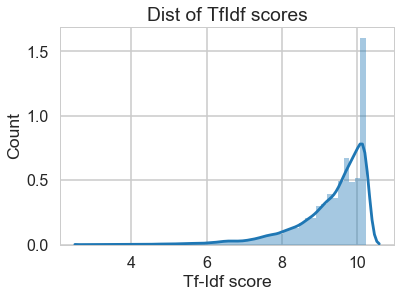

In [111]:
#Plot distribution plot

sns.distplot(tfidf_buckets)
plt.xlabel('Tf-Idf score')
plt.ylabel('Count')
plt.title('Dist of TfIdf scores')